In [2]:
import pandas as pd 
import numpy as np 
import pickle 
from sklearn.metrics import accuracy_score 
# from pdpbox import pdp, info_plots 
from matplotlib import pyplot as plt 
# from pycebox.ice import ice, ice_plot 
# import lime
# from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import plot_partial_dependence

In [3]:
## Load the sigmoid model 
sigmoid = pickle.load(open('sigmoid_model.sav', 'rb')) 

## Load in the data 
## Read in csv 
df = pd.read_csv('model_data.csv', 
                                index_col = ['year', 'ID']).dropna()

## Test and train split for time series
train = df.head(
    int(df.shape[0] * 0.8 ) 
) 

test = df.tail(
    int(df.shape[0] * 0.2) 
)

## Split into x and y 
def SplitData(df): 
    y = df.lead_rating 
    x = df.drop('lead_rating', axis = 1) 
    
    return x, y 

train_x, train_y = SplitData(train) 
test_x, test_y = SplitData(test) 

## Look at the initial model accuracy 
print(
    accuracy_score(sigmoid.predict(test_x), test_y) 
)
print(df.shape) 
cols = df.columns.tolist()
print(cols) 
cols[1]

0.6906077348066298
(1813, 13)
['lead_rating', 'rating', 'IQ_TOTAL_ASSETS', 'IQ_TOTAL_REV', 'IQ_NI_CF', 'IQ_AR', 'IQ_GP ', 'IQ_AP', 'IQ_TOTAL_LIAB', 'IQ_TOTAL_DEBT', 'IQ_CASH_FINAN', 'IQ_TOTAL_EQUITY', 'IQ_CASH_EQUIV']


'rating'

We can see there are 13 columns 

In [3]:
## PDP Plots 
def PDP_Plot_Graphs(test_x, cols): 
    '''Create PDP Plots'''
    
    pdp_plot = [] 
    for i in cols[1:]: 
        '''Create Graph for pdp plots'''
        
        pdp_rating = pdp.pdp_isolate(model = sigmoid, 
                            dataset = test_x, 
                            model_features = cols[1:], 
                            feature = i) 
        
        pdp_plot.append(
        pdp.pdp_plot(pdp_rating, i) 
        )
    return pdp_plot 

#pdp_plots = PDP_Plot_Graphs(test_x, cols) 

Text(0.5, 0, 'IQ_TOTAL_ASSETS')

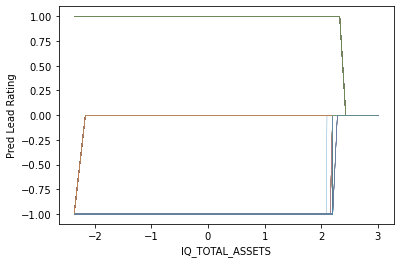

In [50]:
ice_returns = ice(data = test_x, column = cols[2], 
                 predict = sigmoid.predict)
ice_plot(ice_returns, linewidth = 0.3) 
plt.ylabel('Pred Lead Rating') 
plt.xlabel(cols[2])

In [51]:
ice_returns

data_IQ_TOTAL_ASSETS,-2.365157,-2.166659,-2.048155,-2.046422,-1.967422,-1.893556,-1.748016,-1.652120,-1.611341,-1.588143,...,2.445203,2.510462,2.576472,2.651155,2.694110,2.698311,2.782875,2.892913,2.956249,3.013926
rating,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,1.0,-0.0,1.0,-0.0,...,1.0,1.0,-0.0,-1.0,-0.0,-0.0,-1.0,-0.0,-1.0,-1.0
IQ_TOTAL_REV,0.564882,0.001838,0.014159,0.004885,-0.000456,-0.006099,0.003172,0.007316,0.031864,0.037671,...,-0.054232,-0.010658,-0.004765,-0.061801,-0.005067,-0.004843,0.052675,-0.011169,-0.022790,-0.008974
IQ_NI_CF,0.004228,0.006487,0.038367,0.002414,0.000949,-0.039098,0.013929,0.005930,0.009088,0.007185,...,0.025388,-0.002772,-0.002362,-0.014993,-0.073148,0.000966,-0.040681,-0.025985,-0.003056,-0.004961
IQ_AR,-0.024333,0.006369,0.004737,0.007659,0.000000,-0.004618,0.001143,0.001998,0.009995,0.009702,...,-0.079985,0.000000,-0.027081,-0.010932,0.053416,-0.002303,0.002402,-0.007558,-0.030364,-0.002662
IQ_GP,0.016046,-0.000330,0.002891,-0.001572,0.001108,-0.015628,0.001363,0.002821,0.026450,0.032083,...,0.013057,-0.010658,-0.004113,-0.033401,0.004256,-0.003555,0.025978,-0.011497,-0.016386,-0.008983
IQ_AP,-0.014048,0.016212,0.014345,0.003950,0.007810,0.000126,0.002649,0.002207,0.000004,0.004331,...,-0.034995,-0.035775,-0.006109,-0.020289,-0.003207,-0.005096,0.005633,-0.004574,-0.008674,0.001821
IQ_TOTAL_LIAB,-0.028077,-0.043877,0.047937,0.003462,-0.004394,0.013012,0.026498,-0.006788,0.027321,-0.021464,...,-0.063121,-0.000396,0.005237,0.035129,-0.157486,-0.000354,0.159443,0.075970,0.021245,-0.178065
IQ_TOTAL_DEBT,-0.060326,-0.018757,-0.006459,0.020877,-0.001253,0.034843,-0.010809,-0.043938,0.006535,-0.039769,...,0.001573,0.007461,-0.009115,0.061914,-0.086697,0.004857,0.136563,0.076367,0.051845,-0.170931
IQ_CASH_FINAN,-0.048940,-0.013047,-0.010683,-0.003741,-0.001462,-0.007874,0.002950,-0.000190,0.006279,-0.029504,...,0.023018,-0.040568,-0.092807,0.001176,0.022440,0.021279,-0.012004,0.008520,-0.105993,0.002498
IQ_TOTAL_EQUITY,0.028077,0.043877,-0.047937,-0.003462,0.004394,-0.013012,-0.026498,0.006788,-0.027321,0.021464,...,0.063121,-0.031092,-0.005237,-0.035129,0.157486,0.000354,-0.159443,-0.075970,-0.021245,0.178065


# ICE

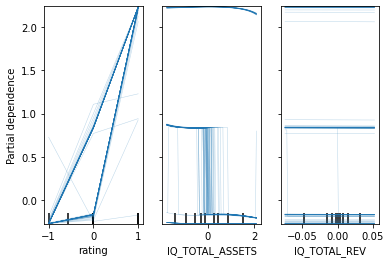

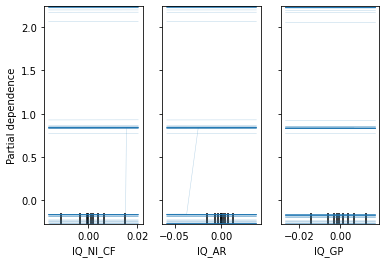

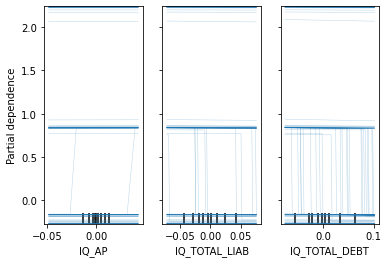

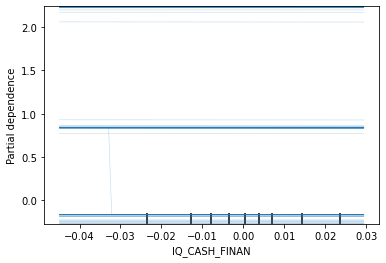

In [4]:

plot_partial_dependence(sigmoid, train_x.sample(100,random_state=1), [0,1,2],target=1,kind='individual') 
plot_partial_dependence(sigmoid, train_x.sample(100,random_state=1), [3,4,5],target=1,kind='individual')
plot_partial_dependence(sigmoid, train_x.sample(100,random_state=1), [6,7,8],target=1,kind='individual')
plot_partial_dependence(sigmoid, train_x.sample(100,random_state=1), [9],target=1,kind='individual')

# PDP

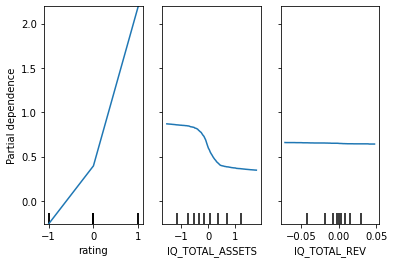

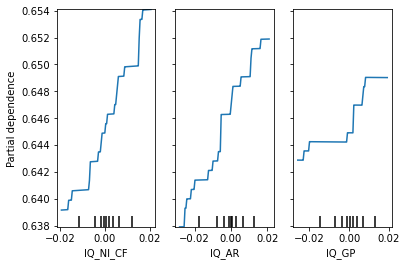

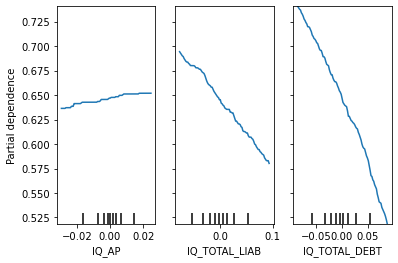

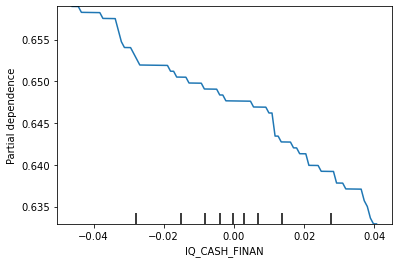

In [5]:
plot_partial_dependence(sigmoid, train_x, [0,1,2],target=1) 
plot_partial_dependence(sigmoid, train_x, [3,4,5],target=1) 
plot_partial_dependence(sigmoid, train_x, [6,7,8],target=1) 
plot_partial_dependence(sigmoid, train_x, [9],target=1) 

# ALE

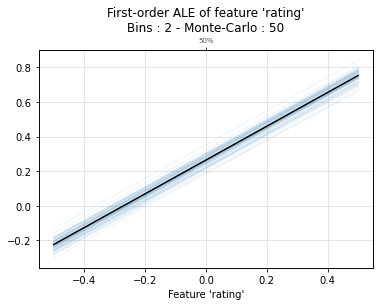

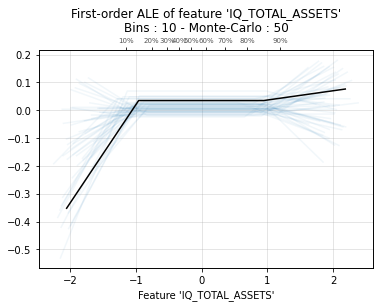

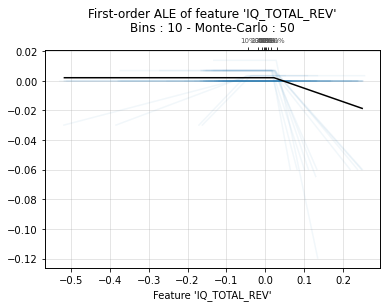

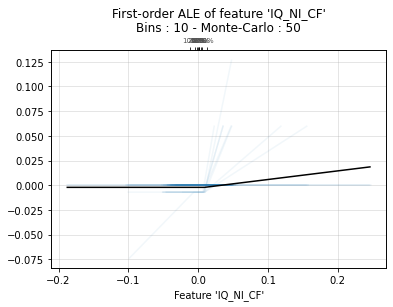

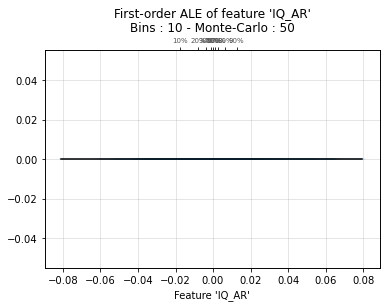

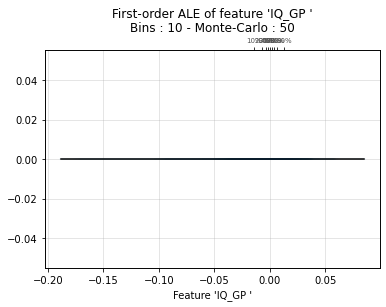

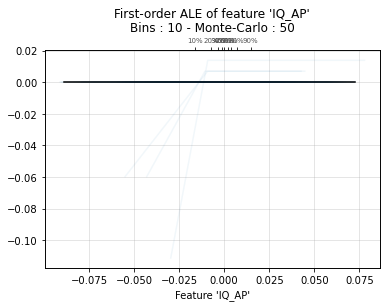

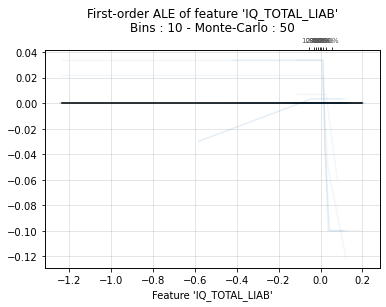

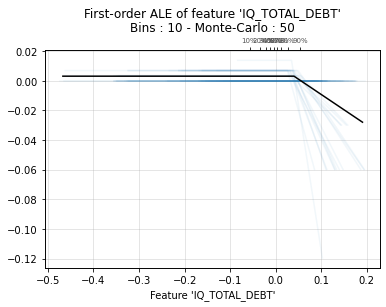

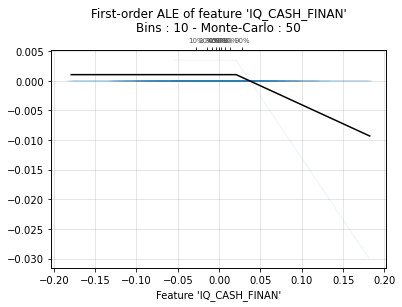

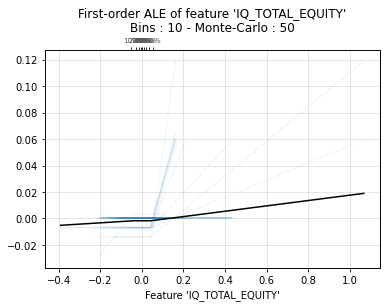

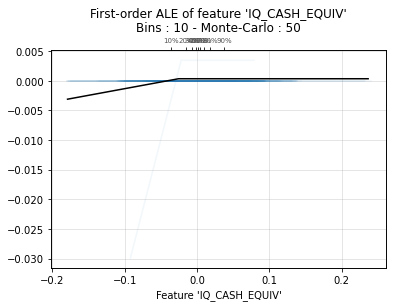

In [7]:
from alepython import ale_plot
# Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
for i in train_x.columns.values:
    ale_plot(sigmoid, train_x, i, monte_carlo=True)

# Permutation Importance

Feature ranking:
1. feature rating (0.310828)
2. feature IQ_TOTAL_REV (0.000138)
3. feature IQ_TOTAL_EQUITY (0.000000)
4. feature IQ_CASH_FINAN (0.000000)
5. feature IQ_TOTAL_DEBT (0.000000)
6. feature IQ_AP (0.000000)
7. feature IQ_GP  (0.000000)
8. feature IQ_AR (0.000000)
9. feature IQ_NI_CF (0.000000)
10. feature IQ_TOTAL_LIAB (-0.000207)
11. feature IQ_TOTAL_ASSETS (-0.000345)
12. feature IQ_CASH_EQUIV (-0.000414)


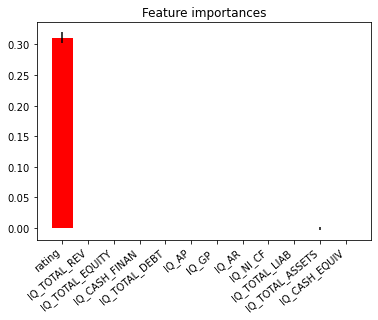

In [9]:
from sklearn.inspection import permutation_importance
result = permutation_importance(sigmoid, train_x, train_y, n_repeats=10, random_state=0)
import matplotlib.pyplot as plt

importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train_x.columns.values[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plot = plt.xticks(range(train_x.shape[1]), train_x.columns.values[indices])
plt.xlim([-1, train_x.shape[1]])
plt.setp(plt.gca().get_xticklabels(), rotation=40, horizontalalignment='right')
plt.savefig("Test.png")
plt.show()